# Model scoring
Plot scores of all sequences in generated_seq


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns



In [2]:
Score_WT=1355.1987

betas = [0.8, 1.0, 1.5, 2.0, 3.0]
model_dir = "seq_scores_model"  
esmif_dir = "seq_esmif_scores"  

merged_dfs = []

for beta in betas:
    model_file = f"{model_dir}/model_lll_generated_seq_Beta{beta}.csv"
    esmif_file = f"{esmif_dir}/lll_generated_seq_Beta{beta}.csv"

    if os.path.exists(model_file) and os.path.exists(esmif_file):
        # Read model and esmif CSV files
        model_df = pd.read_csv(model_file)
        esmif_df = pd.read_csv(esmif_file)
        if beta==1.0:
            distrib_array=esmif_df['log_likelihood'].values

        # Merge on index (assuming same sequence order)
        merged_df = model_df.copy()
        merged_df["log_likelihood"] = esmif_df["log_likelihood"]
        merged_df["beta"] = beta  # Add beta column

        # Append to list
        merged_dfs.append(merged_df)
    else:
        print(f"Missing files for Beta={beta}: {model_file}, {esmif_file}")

# Concatenate all merged dataframes into a single dataframe
final_df = pd.concat(merged_dfs, ignore_index=True)

final_df.columns

Index(['seqid', 'model_score', 'log_likelihood', 'beta'], dtype='object')

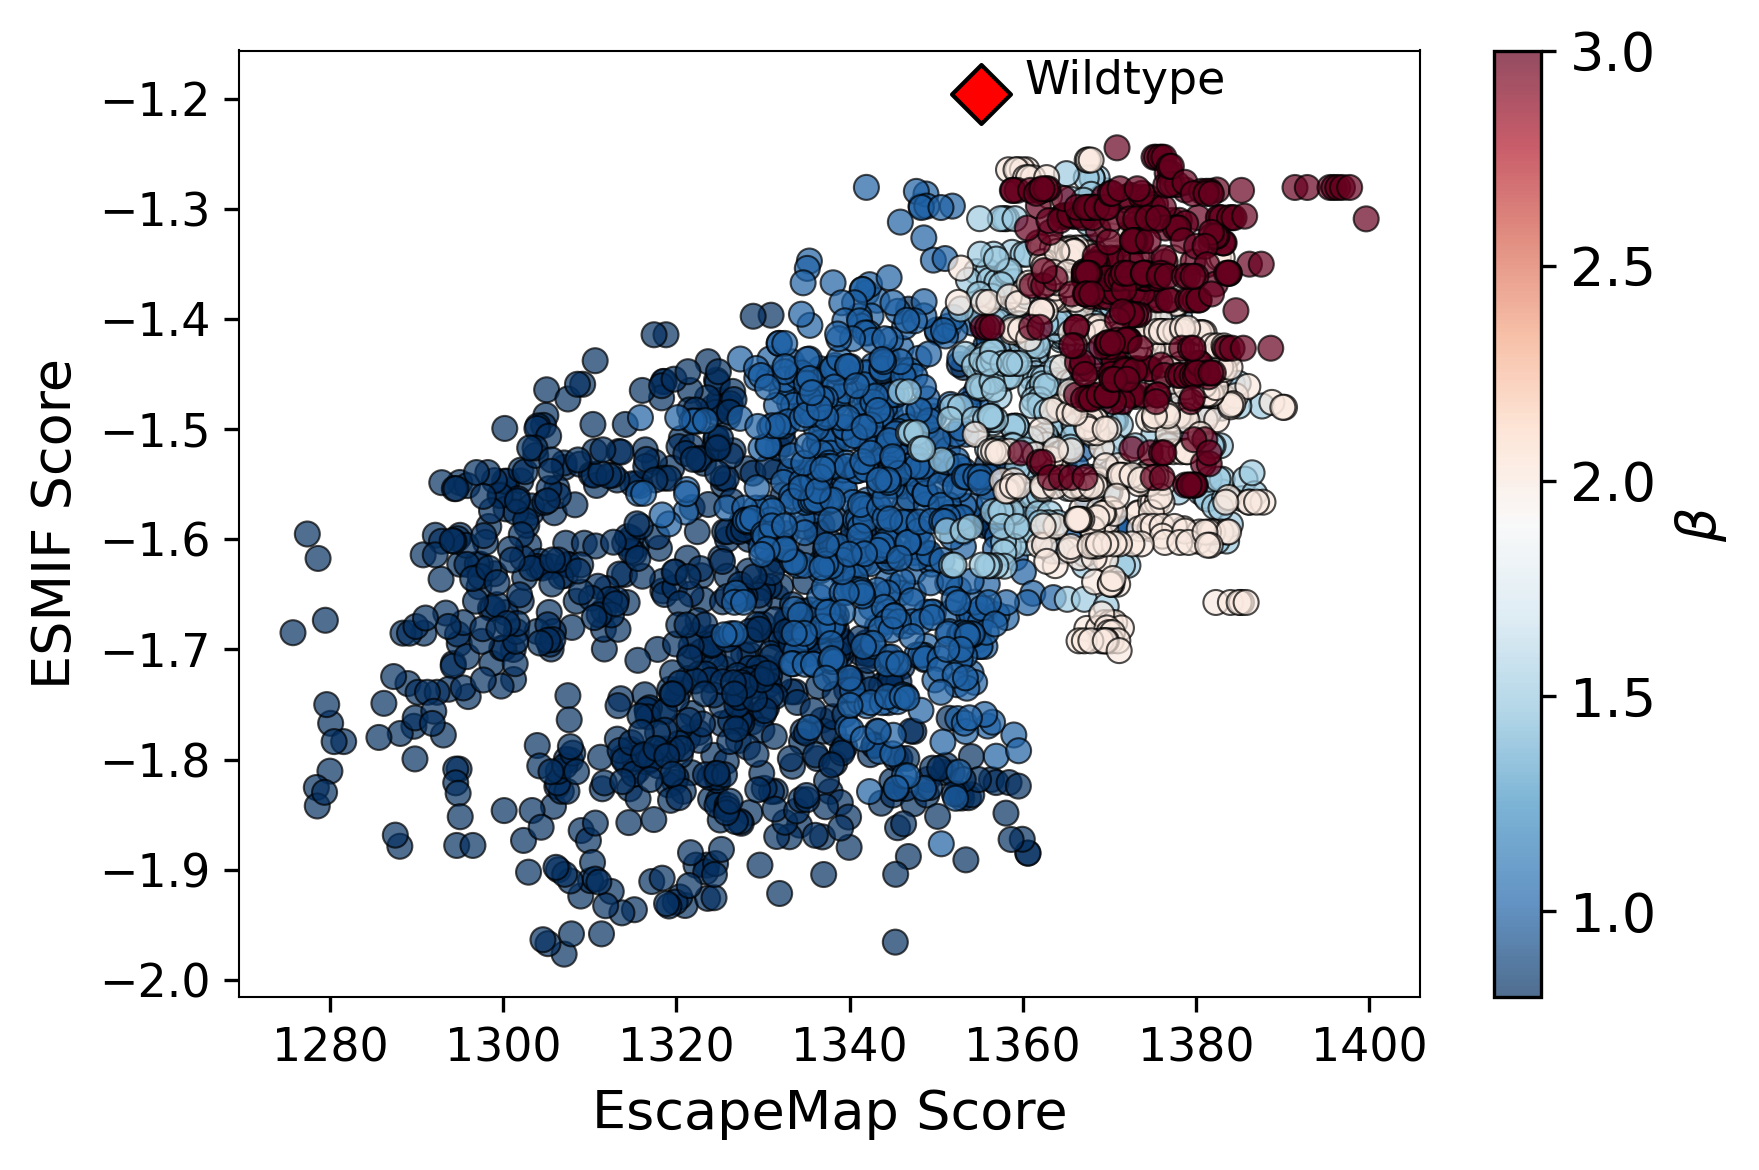

In [3]:


# Create figure
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Plot main scatter
scatter = ax.scatter(
    final_df['model_score'], 
    final_df['log_likelihood'], 
    c=final_df['beta'], 
    cmap=plt.get_cmap('RdBu_r'), 
    alpha=0.7, 
    edgecolors='k',
    linewidths=0.5
)

# Add wildtype point
ax.scatter(Score_WT, -1.1953541863824904, 
           color='red', marker='D', s=100, label='Wildtype', edgecolor='black')
#annotate
ax.annotate('Wildtype', xy=(Score_WT, -1.1953541863824904), 
            xytext=(Score_WT+5, -1.1953541863824904),
            fontsize=11, color='black')

# Legend
# ax.legend(fontsize=11, loc='lower left', frameon=True)

# Colorbar with LaTeX label
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label(r'$\beta$ ', fontsize=13)
cbar.ax.tick_params(labelsize=13)

# Axis labels
ax.set_xlabel('EscapeMap Score', fontsize=13)
ax.set_ylabel('ESMIF Score', fontsize=13)

# Ticks and grid
ax.tick_params(axis='both', labelsize=11)
# ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
#add the ticks on the top and left


# Black frame around plot
for spine in ax.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(0.5)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


In [4]:
conditions = ['COV2-2130', 'COV2-2196', 'LY-CoV555', 'REGN10933', 'S2E12', 'S309', 'SA55', 'VIR7229']
model_dir = "seq_scores_model"  # Change to actual model scores directory
esmif_dir = "seq_esmif_scores"  # Change to actual esmif scores directory

merged_dfs = []

for condition in conditions:
    model_file = f"{model_dir}/model_lll_generated_seq_Beta1.0_Ab_{condition}.csv"
    esmif_file = f"{esmif_dir}/lll_generated_seq_Beta1.0_Ab_{condition}.csv"

    if os.path.exists(model_file) and os.path.exists(esmif_file):
        # Read model and esmif CSV files
        model_df = pd.read_csv(model_file)
        esmif_df = pd.read_csv(esmif_file)

        # Merge on index (assuming same sequence order)
        merged_df = model_df.copy()
        merged_df["log_likelihood"] = esmif_df["log_likelihood"]
        merged_df["condition"] = condition  # Add condition column

        # Append to list
        merged_dfs.append(merged_df)
    else:
        print(f"Missing files for Condition={condition}: {model_file}, {esmif_file}")

# Concatenate all merged dataframes into a single dataframe
condition_df = pd.concat(merged_dfs, ignore_index=True)

condition_df.columns

Index(['seqid', 'model_score', 'log_likelihood', 'condition'], dtype='object')

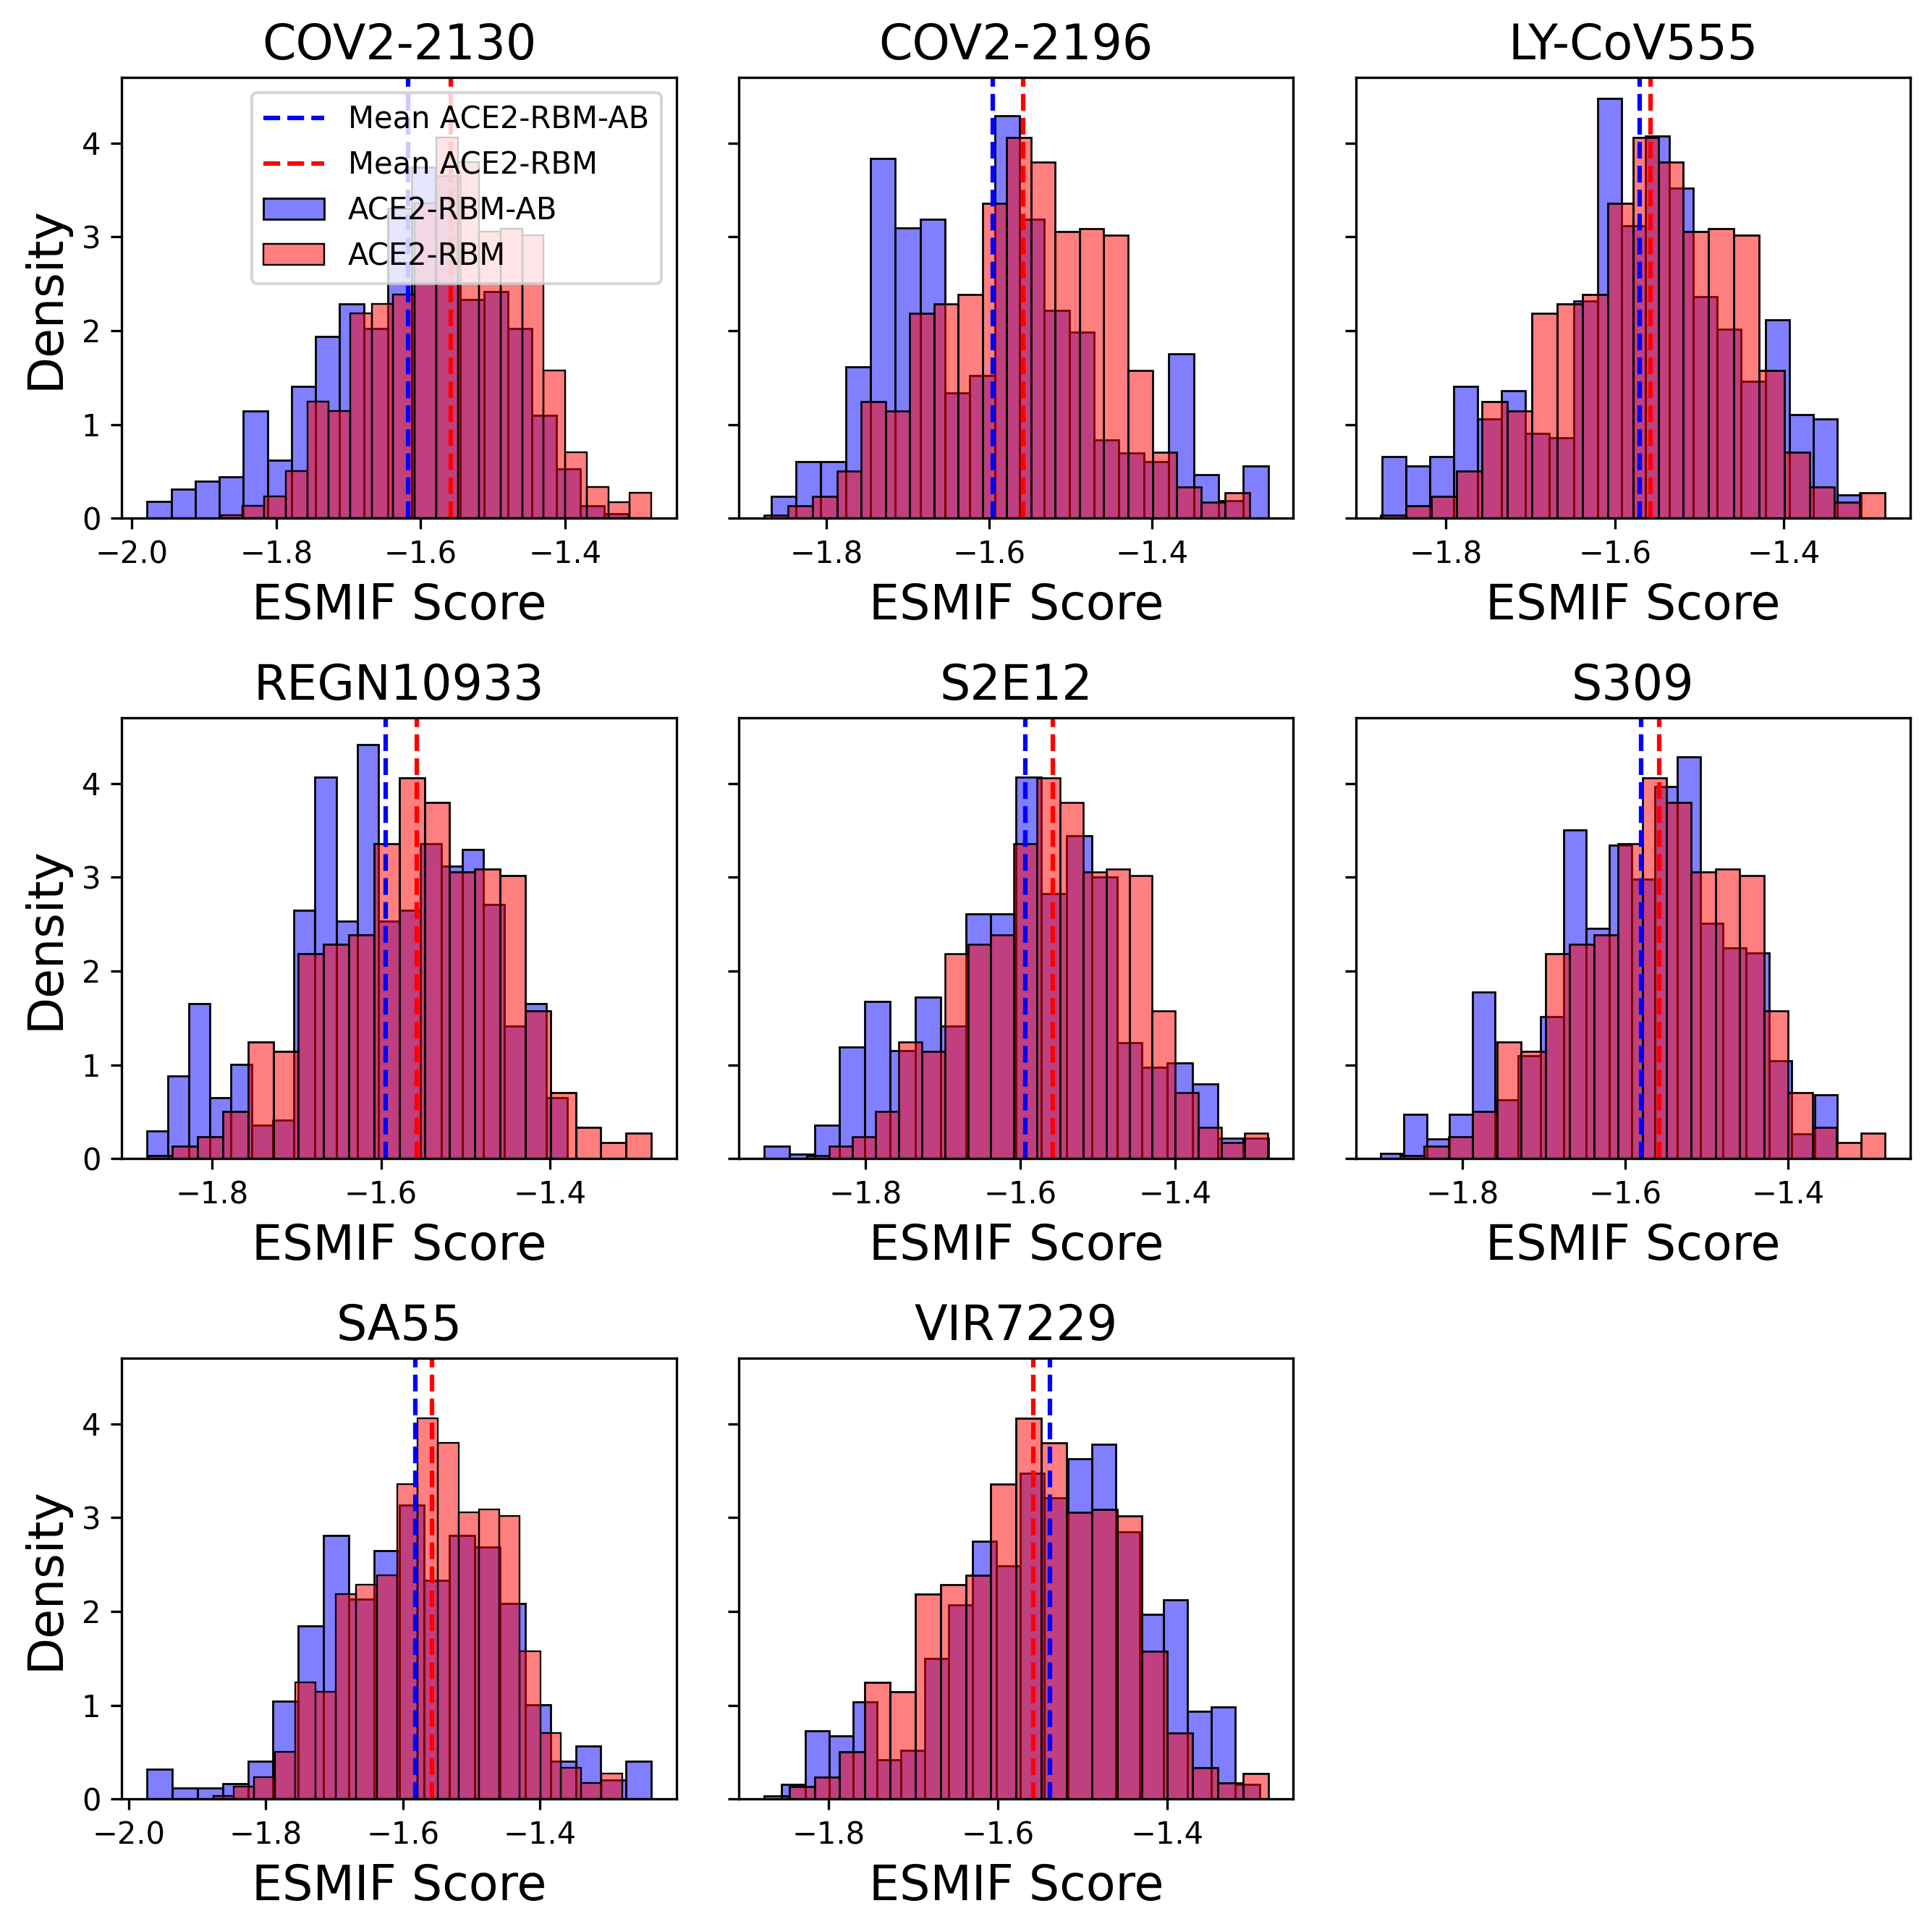

In [5]:


conditions = condition_df['condition'].unique()
n_conditions = len(conditions)

# Determine subplot grid dimensions (3 rows, adjusting columns as needed)
n_rows = 3
n_cols = int(np.ceil(n_conditions / n_rows))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows), dpi=300, sharey=True)
axes = axes.flatten()  # Flatten in case of extra axes

for i, condition in enumerate(conditions):
    subset = condition_df[condition_df['condition'] == condition]['log_likelihood']
    #put in density where the distribution is normalized
    # Normalize the distribution
    
    
    # Plot histogram for the condition
    sns.histplot(subset, bins=20, kde=False, color='blue', alpha=0.5, label='ACE2-RBM-AB', ax=axes[i], stat='density')
    
    # Plot histogram for distrib_array
    sns.histplot(distrib_array, bins=20, kde=False, color='red', alpha=0.5, label='ACE2-RBM', ax=axes[i], stat='density')
    #vertical line at -1.1953541863824904
    # axes[i].axvline(x=-1.1953541863824904, color='red', linestyle='-', label='WT')
    #vertical lines for the means
    axes[i].axvline(x=subset.mean(), color='blue', linestyle='--', label='Mean ACE2-RBM-AB')
    axes[i].axvline(x=distrib_array.mean(), color='red', linestyle='--', label='Mean ACE2-RBM')
                    
      # Title and labels with larger font size
    axes[i].set_title(f'{condition}', fontsize=16)
    axes[i].set_xlabel('ESMIF Score', fontsize=16)
    axes[i].set_ylabel('Density', fontsize=16)
    if i == 0:
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

